In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2 as cv
import seaborn as sns
from PIL import Image
from pathlib import Path
import random

In [10]:
# List classes and count images
dataset_path = Path(r"/home/saroj/smartsort/data")

class_counts = {}

for class_dir in dataset_path.iterdir():
    if class_dir.is_dir():
        num_images = len([f for f in class_dir.iterdir() if f.is_file()])

        class_counts[class_dir.name] = num_images

print(class_counts)


{'plastic': 482, 'glass': 501, 'metal': 410, 'paper': 594, 'trash': 137, 'cardboard': 403}


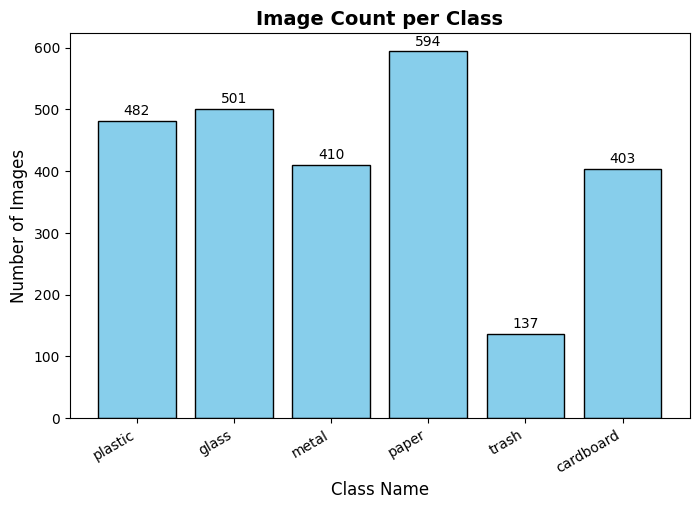

In [14]:
# Visualize your class distribution using a bar chart.
class_names = list(class_counts.keys())
image_counts = list(class_counts.values())

plt.figure(figsize=(8,5))
bars = plt.bar(class_names, image_counts, color='skyblue', edgecolor='black')

plt.title("Image Count per Class", fontsize=14, fontweight='bold')
plt.xlabel("Class Name", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)

# Add value labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5,  # position
             str(yval), ha='center', va='bottom', fontsize=10)


# Rotate x labels for readability (if class names are long)
plt.xticks(rotation=30, ha='right')

plt.show()

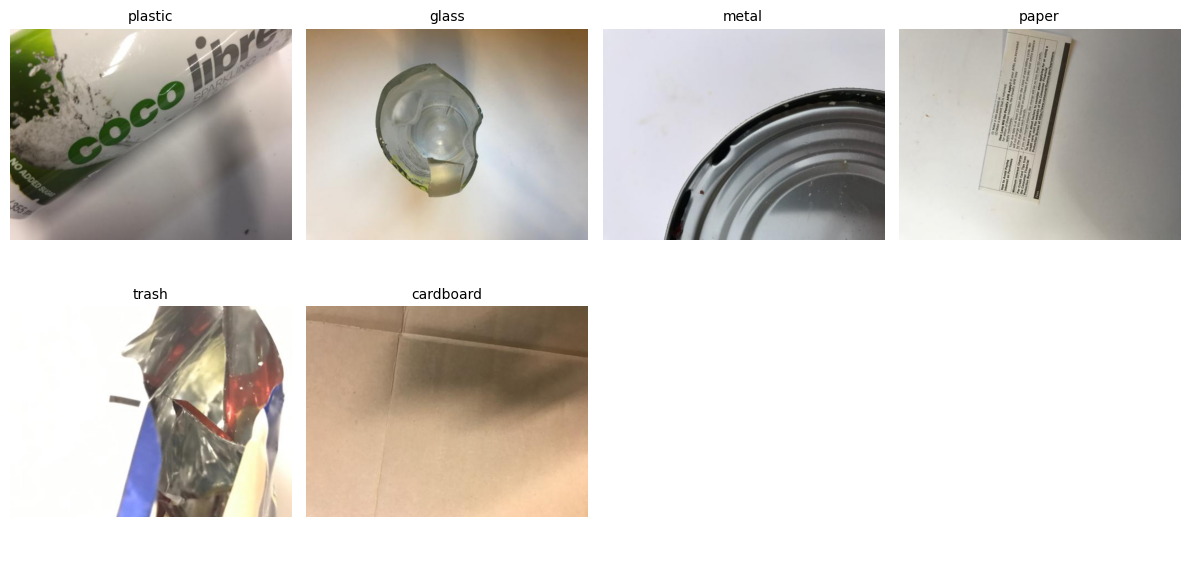

In [16]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import random

# Path to your dataset
dataset_path = Path(r"/home/saroj/smartsort/data")

# Get all class folders
class_dirs = [d for d in dataset_path.iterdir() if d.is_dir()]

# Create a grid
num_classes = len(class_dirs)
cols = 4  # adjust for your dataset
rows = (num_classes + cols - 1) // cols  # automatic row count

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
axes = axes.flatten()  # flatten to easily iterate

for i, class_dir in enumerate(class_dirs):
    # Get all image files in this class
    image_files = [f for f in class_dir.iterdir() if f.suffix.lower() in ['.jpg', '.jpeg', '.png']]
    
    if not image_files:
        continue  # skip if no images
    
    # Pick one random image
    img_path = random.choice(image_files)
    
    # Open the image
    img = Image.open(img_path)
    
    # Show the image
    axes[i].imshow(img)
    axes[i].set_title(class_dir.name, fontsize=10)
    axes[i].axis('off')

# Hide any empty subplots (if total < grid size)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [17]:
from PIL import Image
import random

# Check 3 random images from each class
for class_dir in class_dirs:
    image_files = [f for f in class_dir.iterdir() if f.suffix.lower() in ['.jpg', '.jpeg', '.png']]
    
    if not image_files:
        continue
    
    print(f"\nClass: {class_dir.name}")
    samples = random.sample(image_files, min(3, len(image_files)))  # up to 3 samples
    
    for img_path in samples:
        with Image.open(img_path) as img:
            width, height = img.size
            print(f"  {img_path.name}: {width}x{height}")



Class: plastic
  plastic373.jpg: 512x384
  plastic100.jpg: 512x384
  plastic406.jpg: 512x384

Class: glass
  glass474.jpg: 512x384
  glass76.jpg: 512x384
  glass457.jpg: 512x384

Class: metal
  metal301.jpg: 512x384
  metal335.jpg: 512x384
  metal138.jpg: 512x384

Class: paper
  paper296.jpg: 512x384
  paper497.jpg: 512x384
  paper498.jpg: 512x384

Class: trash
  trash116.jpg: 512x384
  trash14.jpg: 512x384
  trash59.jpg: 512x384

Class: cardboard
  cardboard25.jpg: 512x384
  cardboard181.jpg: 512x384
  cardboard332.jpg: 512x384
